# 1. Predicción de enfermedades (Nivel Avanzado)

### En el archivo "diagnosis.csv" Los datos han sido creados por un experto médico para poner a prueba un modelo que permite predecir dos enfermedades del sistema urinario. Los datos son:

### id: identificado del registro
### a1: temperatura del paciente
### a2: ocurrencia de nauseas
### a3: dolor lumbar
### a4: necesidad continua de orinar
### a5: dolores miccionales
### a6: ardor de la uretra, picazón o hinchazón de la salida de la uretra

### Las enfermedades que se desean evaluar son:

### d1: inflamación de la vejiga urinaria
### d2: nefritis de origen en la pelvis renal
### Crear un modelo que permite predecir cada una de las enfermedades con los datos suministrados. Evaluar el rendimiento de los modelos.

In [1]:
%pylab
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import csv
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('diagnosis.csv',sep=';')

#data[34]=pd.get_dummies(data[34])
data.describe()

,id,a1,a2,a3,a4,a5,a6,d1,d2
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,38.724167,0.241667,0.583333,0.666667,0.491667,0.416667,0.491667,0.416667
std,34.785054,1.819132,0.429888,0.495074,0.473381,0.502027,0.495074,0.502027,0.495074
min,1.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.750000,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.500000,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,90.250000,40.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,120.000000,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
data.head(10)

,id,a1,a2,a3,a4,a5,a6,d1,d2
0,1,35.5,0,1,0,0,0,0,0
1,2,35.9,0,0,1,1,1,1,0
2,3,35.9,0,1,0,0,0,0,0
3,4,36.0,0,0,1,1,1,1,0
4,5,36.0,0,1,0,0,0,0,0
5,6,36.0,0,1,0,0,0,0,0
6,7,36.2,0,0,1,1,1,1,0
7,8,36.2,0,1,0,0,0,0,0
8,9,36.3,0,0,1,1,1,1,0
9,10,36.6,0,0,1,1,1,1,0


## Procedemos a elimnar la columna ID dado que no tienes ninguna relación con el resto de columnas

In [4]:
del data['id']

## Hacemos un análisis de correlación de varables antes de elegir un modelo adecuado a los datos

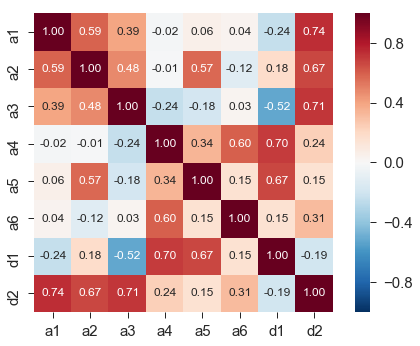

In [5]:
#cols = data.columns
cols = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5,style="ticks", color_codes=True)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.show()

## Dado el enunciado separamos las variables D1 y D2 para 2 dataset distintos y procesar en nuestro modelo de forma separada

In [6]:
target_d1 = 'd1'
features_d1 = list(data.columns)
features_d1.remove('d1')
features_d1.remove('d2')

target_d2 = 'd2'
features_d2 = list(data.columns)
features_d2.remove('d1')
features_d2.remove('d2')

In [7]:
x_d1 = data[features_d1] 
y_d1 = data[target_d1]

x_d2 = data[features_d2] 
y_d2 = data[target_d2]

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_d1, y_d1, test_size=0.2, random_state=0) 

X_train2, X_test2, y_train2, y_test2 = train_test_split(x_d2, y_d2, test_size=0.2, random_state=0) 

In [9]:
print(len(X_train1),len(X_test1))
print(len(X_train2),len(X_test2))

96 24
96 24


In [11]:
type(X_test1)

pandas.core.frame.DataFrame

## Buscando un punto de partida para el resultado esperado, implementamos un modelo DUMMY, que si bien es cierto es un modelo muy básico nuestro modelo final debe superar, si no lo hace podremos suponer que algo no va bien

In [109]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')


print("DATASET CON VARIABLE D1")
clf.fit(X_train1, y_train1)
print('Score of Dummy Classifier most_frequent in train: %.3f' % clf.score(X_train1, y_train1))
clf.fit(X_test1, y_test1)
print('Score of Dummy Classifier in test : %.3f' % clf.score(X_test1, y_test1))
print('')
print("DATASET CON VARIABLE D2")
clf.fit(X_train2, y_train2)
print('Score of Dummy Classifier in train: %.3f' % clf.score(X_train2, y_train2))
clf.fit(X_test2, y_test2)
print('Score of Dummy Classifier in test : %.3f' % clf.score(X_test2, y_test2))

print('')
print('Observamos que los resultados son bajos porque el modelo es muy basico pero nos da un punto de partida')

#clf2 = DummyClassifier(strategy='stratified')
#clf2.fit(X_train1, y_train1)
#print('Score of Dummy Classifier stratified in train: %.3f' % clf2.score(X_train1, y_train1))
#print('Score of Dummy Classifier stratified in test : %.3f' % clf2.score(X_test1, y_test1))
#print('Score of Dummy Classifier stratified in train: %.3f' % clf2.score(X_train2, y_train2))
#print('Score of Dummy Classifier stratified in test : %.3f' % clf2.score(X_test2, y_test2))

DATASET CON VARIABLE D1
Score of Dummy Classifier most_frequent in train: 0.500
Score of Dummy Classifier in test : 0.542

DATASET CON VARIABLE D2
Score of Dummy Classifier in train: 0.552
Score of Dummy Classifier in test : 0.708

Observamos que los resultados son bajos porque el modelo es muy basico pero nos da un punto de partida


In [110]:
def metricas_modelos(y_true, y_pred,varbose=True):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
    import matplotlib.pyplot as plt
    
    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)
    
    
    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    if varbose:
        print('La matriz de confusión es')
        print('[TP     FP(I)]')
        print('[FN(II) TN   ]')
        print()
        print(confusion_matrix)

        print('Precisión:', accuracy_score(y_true, y_pred))
        print('Exactitud:', precision_score(y_true, y_pred))
        print('Exhaustividad:', recall_score(y_true, y_pred))
        print('F1:', f1_score(y_true, y_pred))

        

        print('AUC:', auc(false_positive_rate, recall))
    
   
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)
    plt.show()

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[48  0]
 [ 0 48]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


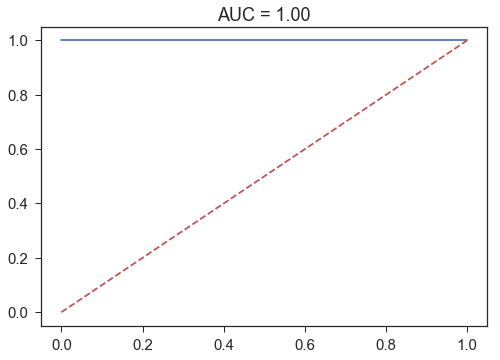

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[13  0]
 [ 0 11]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


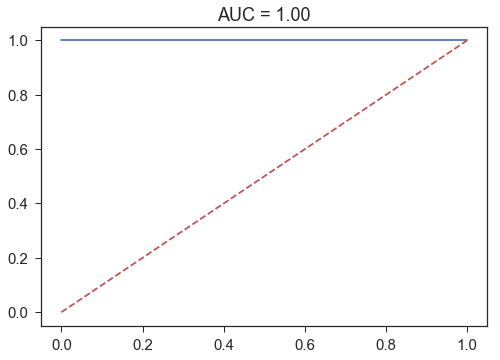

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[53  0]
 [ 0 43]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


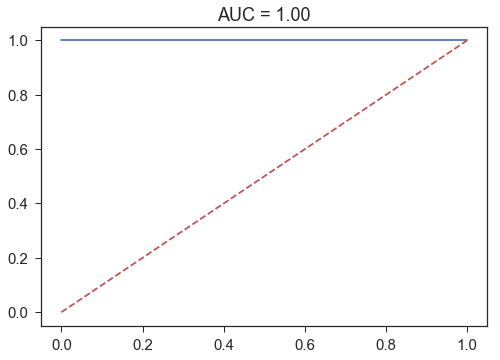

La matriz de confusión es
[TP     FP(I)]
[FN(II) TN   ]

[[17  0]
 [ 0  7]]
Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0
F1: 1.0
AUC: 1.0


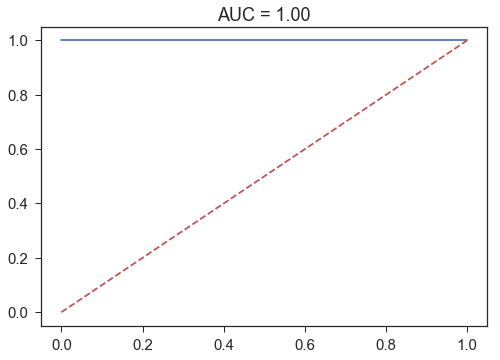

In [111]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import preprocessing

classifier1 = LogisticRegression().fit(X_train1, y_train1)
y_pred_train1 = classifier1.predict(X_train1)
y_pred_test1 = classifier1.predict(X_test1)

metricas_modelos(y_train1, y_pred_train1)
metricas_modelos(y_test1, y_pred_test1)


classifier2 = LogisticRegression().fit(X_train2, y_train2)
y_pred_train2 = classifier2.predict(X_train2)
y_pred_test2 = classifier2.predict(X_test2)

metricas_modelos(y_train2, y_pred_train2)
metricas_modelos(y_test2, y_pred_test2)


# Vemos que los resultados para todos los casos es un 100% tanto para el dataset con variable D1(X_train1, y_train1) y lo mismo para el dataset con variable D2 ((X_train2, y_train2)

## estos se puede explicar observanco la matrix de confusión donde vemos que para todos lo casos los FP y FN tienen calor cero

### ============================

### Adicionalmente, dado que tener un resultado al 100% nos puede llevar a varios supuesta para dar una explicación certera del problema

### Para ellos se propone utilizar una técnica de BAGGING para analizar distintos modelos y ver su comportamento

### Para este ensayo solo se utilizara el dataset con variable D1

In [12]:
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.plotting import plot_decision_regions
import itertools


clf1 = LogisticRegression(random_state=1,C=0.01)
clf2 = RandomForestClassifier(random_state=1,max_leaf_nodes=1000)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(max_leaf_nodes=1000)
clf5 = KNeighborsClassifier(n_neighbors=2)
clf6 = SVC(kernel='rbf', probability=True)

#x1 = X_train.values
#y1 = y_train.values

#eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3),('DTree', clf4),('KN', clf5),('SVC', clf6)]
                        ,voting='soft'
                        ,weights=[1,1,1,1,1,1])


clf1 = clf1.fit(X_train1,y_train1)
clf2 = clf2.fit(X_train1,y_train1)
clf3 = clf3.fit(X_train1,y_train1)
clf4 = clf3.fit(X_train1,y_train1)
clf5 = clf3.fit(X_train1,y_train1)
clf6 = clf3.fit(X_train1,y_train1)
eclf = eclf.fit(X_train1,y_train1)

lb = ['Logistic Regression','Random Forest', 'naive Bayes', 'DecisionTree','KNeighbors','SVC', 'Ensemble']

for clf, label, grd in zip([clf1, clf2, clf3,clf4,clf5,clf6, eclf], lb,itertools.product([0, 1, 2], repeat=2)):
    scores = cross_val_score(clf, X_train1, y_train1, cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    

    y_pred_train1 = clf.predict(X_train1)
    #y_pred_test = clf.predict(X_test)
    #metricas_modelos(y_train1, y_pred_train1,True)
    


Accuracy: 0.94 (+/- 0.06) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [Random Forest]
Accuracy: 0.82 (+/- 0.09) [naive Bayes]
Accuracy: 0.82 (+/- 0.09) [DecisionTree]
Accuracy: 0.82 (+/- 0.09) [KNeighbors]
Accuracy: 0.82 (+/- 0.09) [SVC]
Accuracy: 1.00 (+/- 0.00) [Ensemble]


### Según este proceso para TRAIN, el modelo que mejor se ajusta es "Logistic Regression" con una presición de 89% seguido por Random Forest, Naive Bayes,DecisionTree,DecisionTree con una presición de 83%

### Note que la Logistic Regression tiene una presión de 89% vs al 100% del paso anterior, eso es porque se vario el Learning Rate a  0.01

In [91]:
clf1 = clf1.fit(X_test1,y_test1)
clf2 = clf2.fit(X_test1,y_test1)
clf3 = clf3.fit(X_test1,y_test1)
clf4 = clf3.fit(X_test1,y_test1)
clf5 = clf3.fit(X_test1,y_test1)
clf6 = clf3.fit(X_test1,y_test1)
eclf = eclf.fit(X_test1,y_test1)

lb = ['Logistic Regression','Random Forest', 'naive Bayes', 'DecisionTree','KNeighbors','SVC', 'Ensemble']

for clf, label, grd in zip([clf1, clf2, clf3,clf4,clf5,clf6, eclf], lb,itertools.product([0, 1, 2], repeat=2)):
    scores = cross_val_score(clf, X_test1, y_test1, cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    

    #y_pred_train = clf.predict(X_train)
    y_pred_test1 = clf.predict(X_test1)
    #metricas_modelos(y_test1, y_pred_test1,True)
    


Accuracy: 0.63 (+/- 0.11) [Logistic Regression]
Accuracy: 0.93 (+/- 0.13) [Random Forest]
Accuracy: 0.67 (+/- 0.26) [naive Bayes]
Accuracy: 0.67 (+/- 0.26) [DecisionTree]
Accuracy: 0.67 (+/- 0.26) [KNeighbors]
Accuracy: 0.67 (+/- 0.26) [SVC]
Accuracy: 0.95 (+/- 0.10) [Ensemble]


### Según este proceso para TEST, el modelo que mejor se ajusta es "Random Forest" con una presición de 93% seguido por Naive Bayes,DecisionTree,DecisionTree,KNeighbors,SVC con una presición de 67%
### notamos tambien un baja en la presión de Logistic Regression de 63%

### Un factor importante de hacer un bagging es que se puede comparar rapidamente el resultados de modelos y tambien que podemos dar el INPUT a los pesos e indicar si queremos que sear HARD o SOFT(promediados)

### Finalmente comprobamos que hemos superado nuestro punto de partida con el modelo DUMMY que tenia un resultado de 0.51 para TRAIN y 50% para TEST